In this notebook, we count the number of unique reactions across both enzymatic and synthetic organic chemistry datasets as well as the number of unique mappings across these datasets. Given that each reaction can map to more than one rule, we have counted both the number of unique reactions just by themselves as well the number of unique reaction-template pairs.

In [38]:
import pandas as pd

In [39]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [40]:
mapped_USPTO50K_CHO_df = pd.read_csv("../data/processed/mapped_USPTO50K_CHO.csv")
mapped_USPTO50K_N_df = pd.read_csv("../data/processed/mapped_USPTO50K_N.csv")
mapped_USPTO50K_onlyS_df = pd.read_csv("../data/processed/mapped_USPTO50K_onlyS.csv")

In [41]:
mapped_USPTO50K_CHO_df = mapped_USPTO50K_CHO_df[~mapped_USPTO50K_CHO_df.duplicated()]
num_unique_rxns_USPTO50K_CHO = len(set(mapped_USPTO50K_CHO_df['Reaction']))
print(f'Number of unique mapped reactions from USPTO50K with C, H, O only: {mapped_USPTO50K_CHO_df.shape[0]}')
print(f'Number of unique reactions only from USPTO50K C, H, O: {num_unique_rxns_USPTO50K_CHO}')
print('')

mapped_USPTO50K_N_df = mapped_USPTO50K_N_df[~mapped_USPTO50K_N_df.duplicated()]
num_unique_rxns_USPTO50K_N = len(set(mapped_USPTO50K_N_df['Reaction']))
print(f'Number of unique mapped reactions from USPTO50K with N: {mapped_USPTO50K_N_df.shape[0]}')
print(f'Number of unique reactions only from USPTO50K N: {num_unique_rxns_USPTO50K_N}')
print('')

mapped_USPTO50K_onlyS_df = mapped_USPTO50K_onlyS_df[~mapped_USPTO50K_onlyS_df.duplicated()]
num_unique_rxns_USPTO50K_onlyS = len(set(mapped_USPTO50K_onlyS_df['Reaction']))
print(f'Number of unique mapped reactions from USPTO50K with S: {mapped_USPTO50K_onlyS_df.shape[0]}')
print(f'Number of unique reactions only from USPTO50K: {num_unique_rxns_USPTO50K_onlyS}')
print('')

Number of unique mapped reactions from USPTO50K with C, H, O only: 9102
Number of unique reactions only from USPTO50K C, H, O: 9017

Number of unique mapped reactions from USPTO50K with N: 21057
Number of unique reactions only from USPTO50K N: 20928

Number of unique mapped reactions from USPTO50K with S: 1189
Number of unique reactions only from USPTO50K: 1183



In [42]:
mapped_KEGG_df = pd.read_csv("../data/processed/EnzymeMap_KEGG_imt_rule_mappings.csv")
mapped_MetaCyc_df = pd.read_csv("../data/processed/EnzymeMap_MetaCyc_imt_rule_mappings.csv")
mapped_BRENDA_df = pd.read_csv("../data/processed/EnzymeMap_all_BRENDA_imt_rule_mappings.csv")

In [6]:
# when counting the number of biological reactions that have been mapped, we only consider the reaction string
mapped_KEGG_df = mapped_KEGG_df[~mapped_KEGG_df.duplicated()]
num_unique_rxns_KEGG = len(set(mapped_KEGG_df.loc[:,'Reaction']))
print(f'Number of unique mapped reaction-template pairs from KEGG: {mapped_KEGG_df.shape[0]}')
print(f'Number of unique reactions only from KEGG: {num_unique_rxns_KEGG}')
print()

mapped_MetaCyc_df = mapped_MetaCyc_df[~mapped_MetaCyc_df.duplicated()]
num_unique_rxns_MetaCyc = len(set(mapped_MetaCyc_df.loc[:,'Reaction']))
print(f'Number of unique mapped reaction-template from MetaCyc: {mapped_MetaCyc_df.shape[0]}')
print(f'Number of unique reactions only from MetaCyc: {num_unique_rxns_MetaCyc}')
print()

mapped_BRENDA_df = mapped_BRENDA_df[~mapped_BRENDA_df.duplicated()]
num_unique_rxns_BRENDA = len(set(mapped_BRENDA_df.loc[:,'Reaction']))
print(f'Number of unique mapped reactions from BRENDA: {mapped_BRENDA_df.shape[0]}')
print(f'Number of unique reactions only from BRENDA: {num_unique_rxns_BRENDA}')
print()

Number of unique mapped reaction-template pairs from KEGG: 14530
Number of unique reactions only from KEGG: 3787

Number of unique mapped reaction-template from MetaCyc: 6842
Number of unique reactions only from MetaCyc: 2244

Number of unique mapped reactions from BRENDA: 85871
Number of unique reactions only from BRENDA: 22310



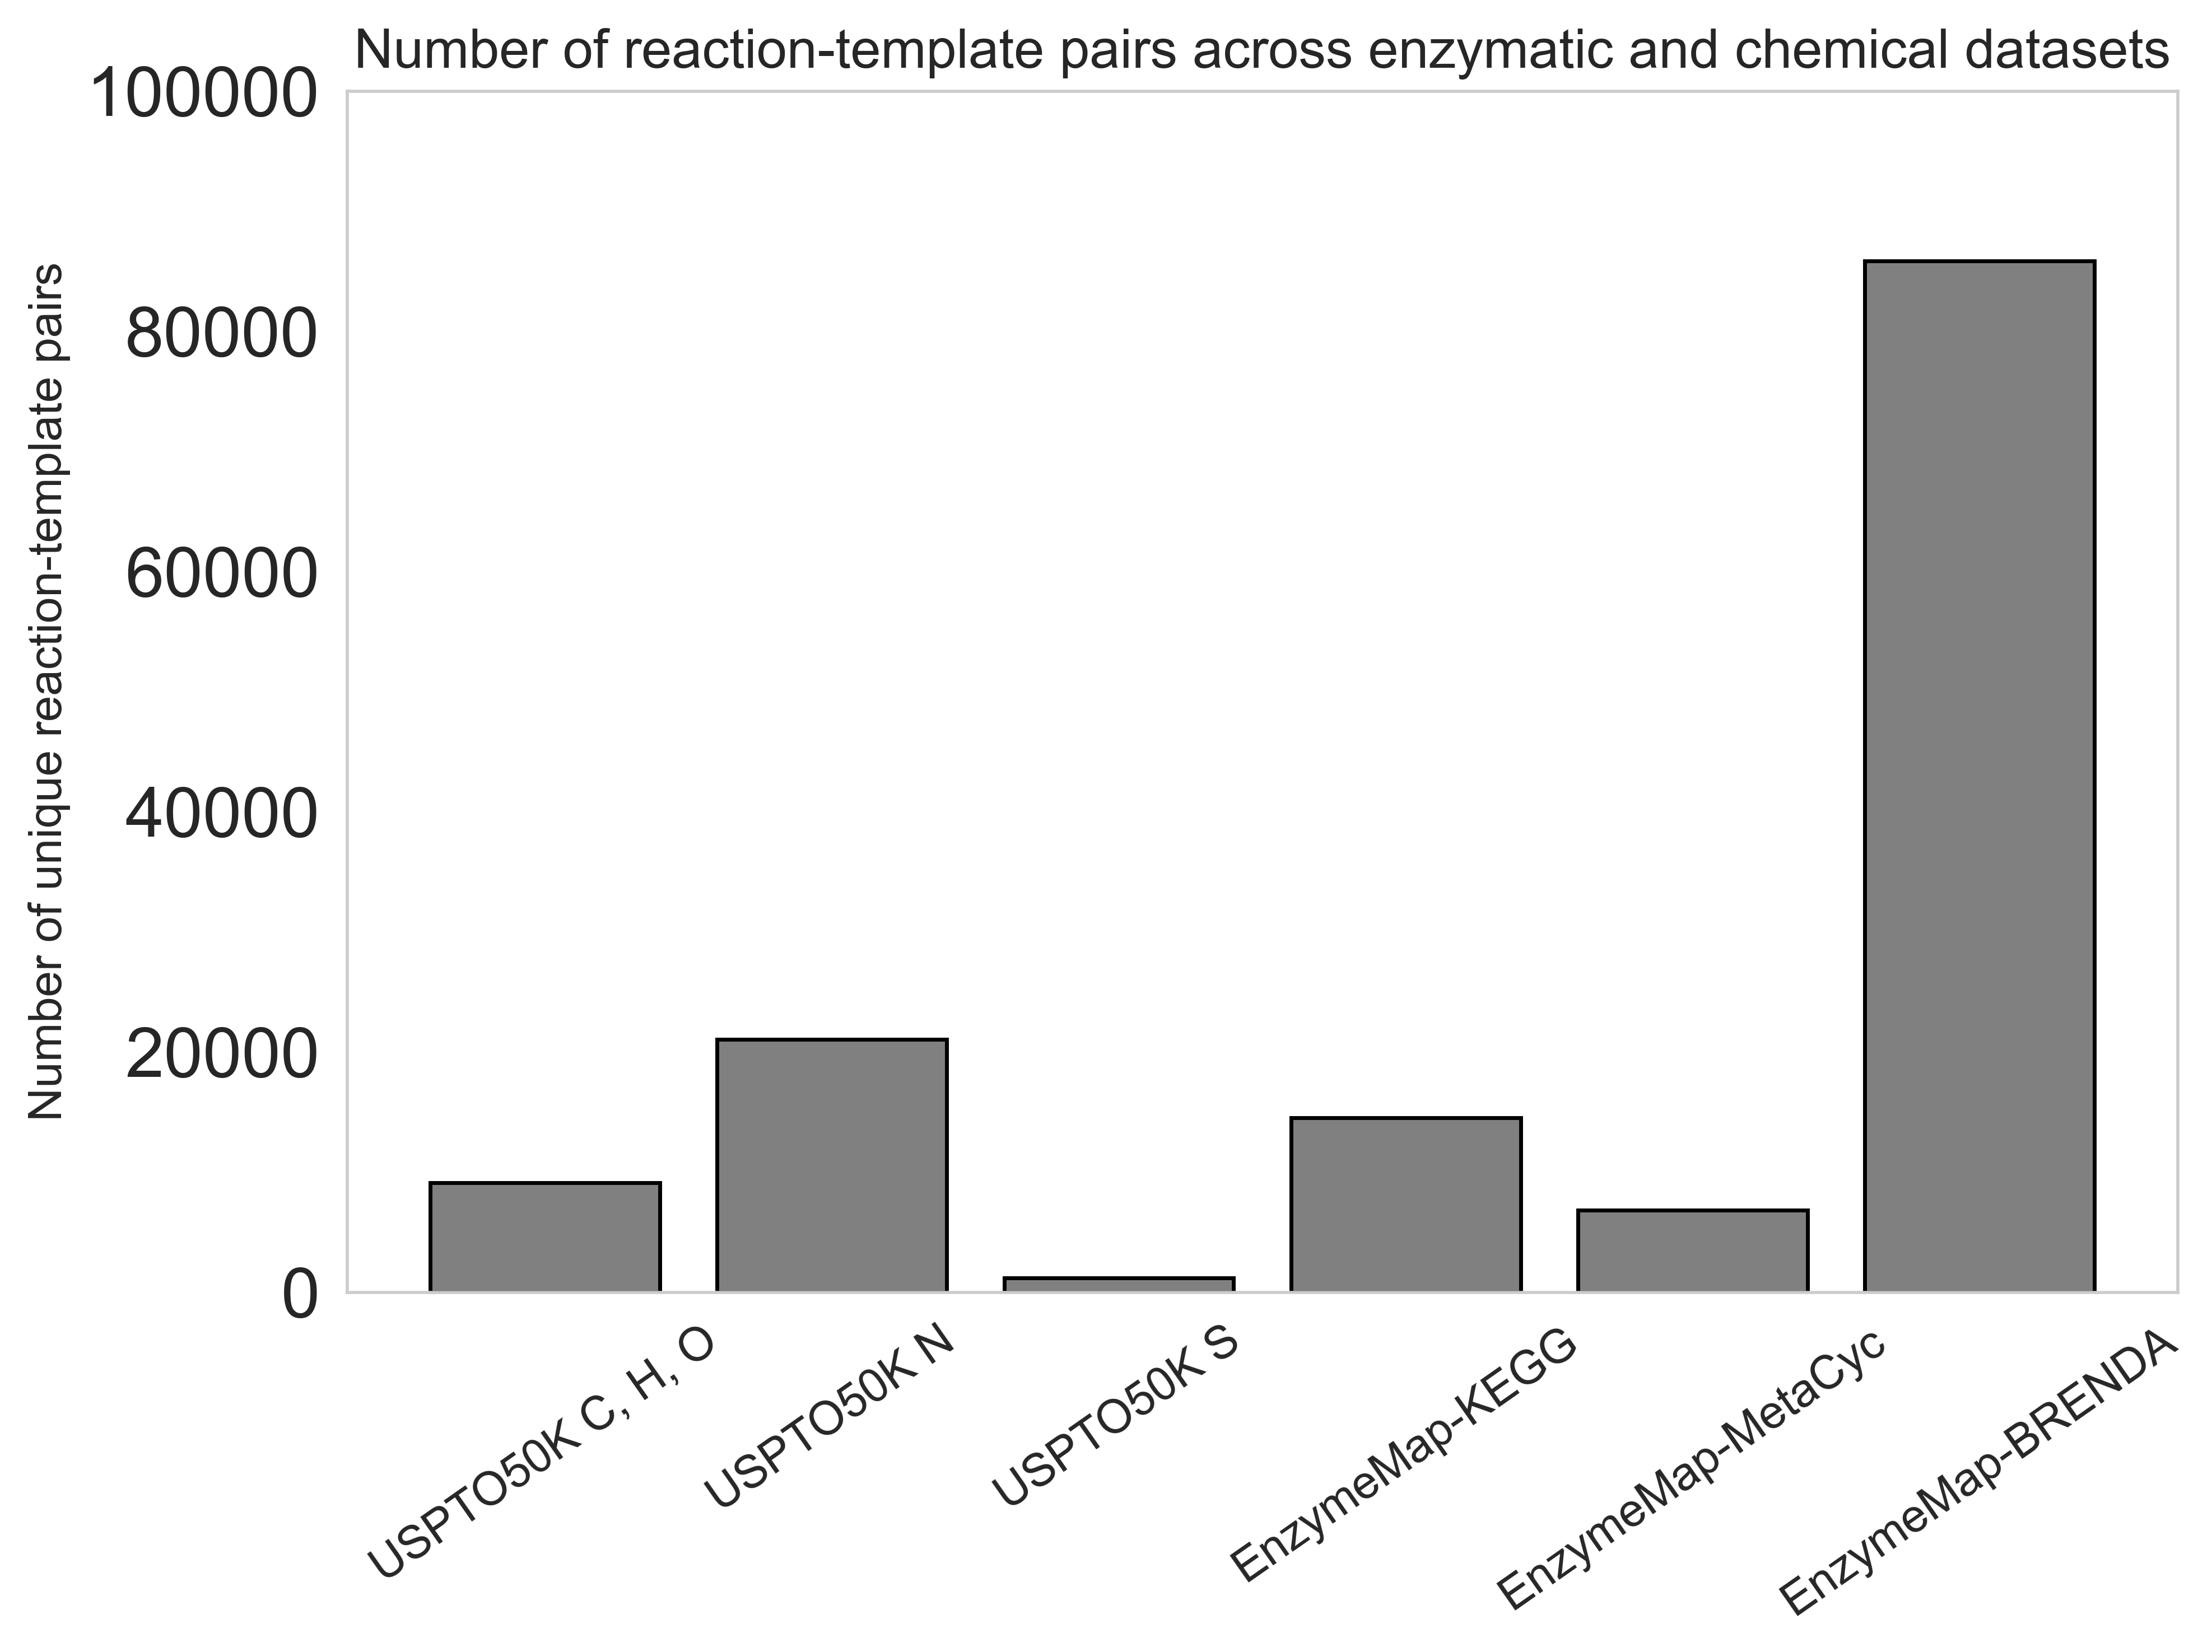

In [7]:
import matplotlib.pyplot as plt

labels = ['USPTO50K C, H, O', 
          'USPTO50K N', 
          'USPTO50K S',
          'EnzymeMap-KEGG',
          'EnzymeMap-MetaCyc',
          'EnzymeMap-BRENDA',]

values = [mapped_USPTO50K_CHO_df.shape[0], 
          mapped_USPTO50K_N_df.shape[0], 
          mapped_USPTO50K_onlyS_df.shape[0],
          mapped_KEGG_df.shape[0],
          mapped_MetaCyc_df.shape[0],
          mapped_BRENDA_df.shape[0]]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='grey', edgecolor = 'k')

# Labels and title
plt.xticks(rotation = 35, fontsize = 12)
plt.ylabel('Number of unique reaction-template pairs', fontsize = 12)
plt.title('Number of reaction-template pairs across enzymatic and chemical datasets', fontsize = 14)
plt.grid(visible = False)
plt.ylim([0, 100000])
plt.savefig('../figures/distribution_of_unique_reaction_template_pairs.png')
plt.show()

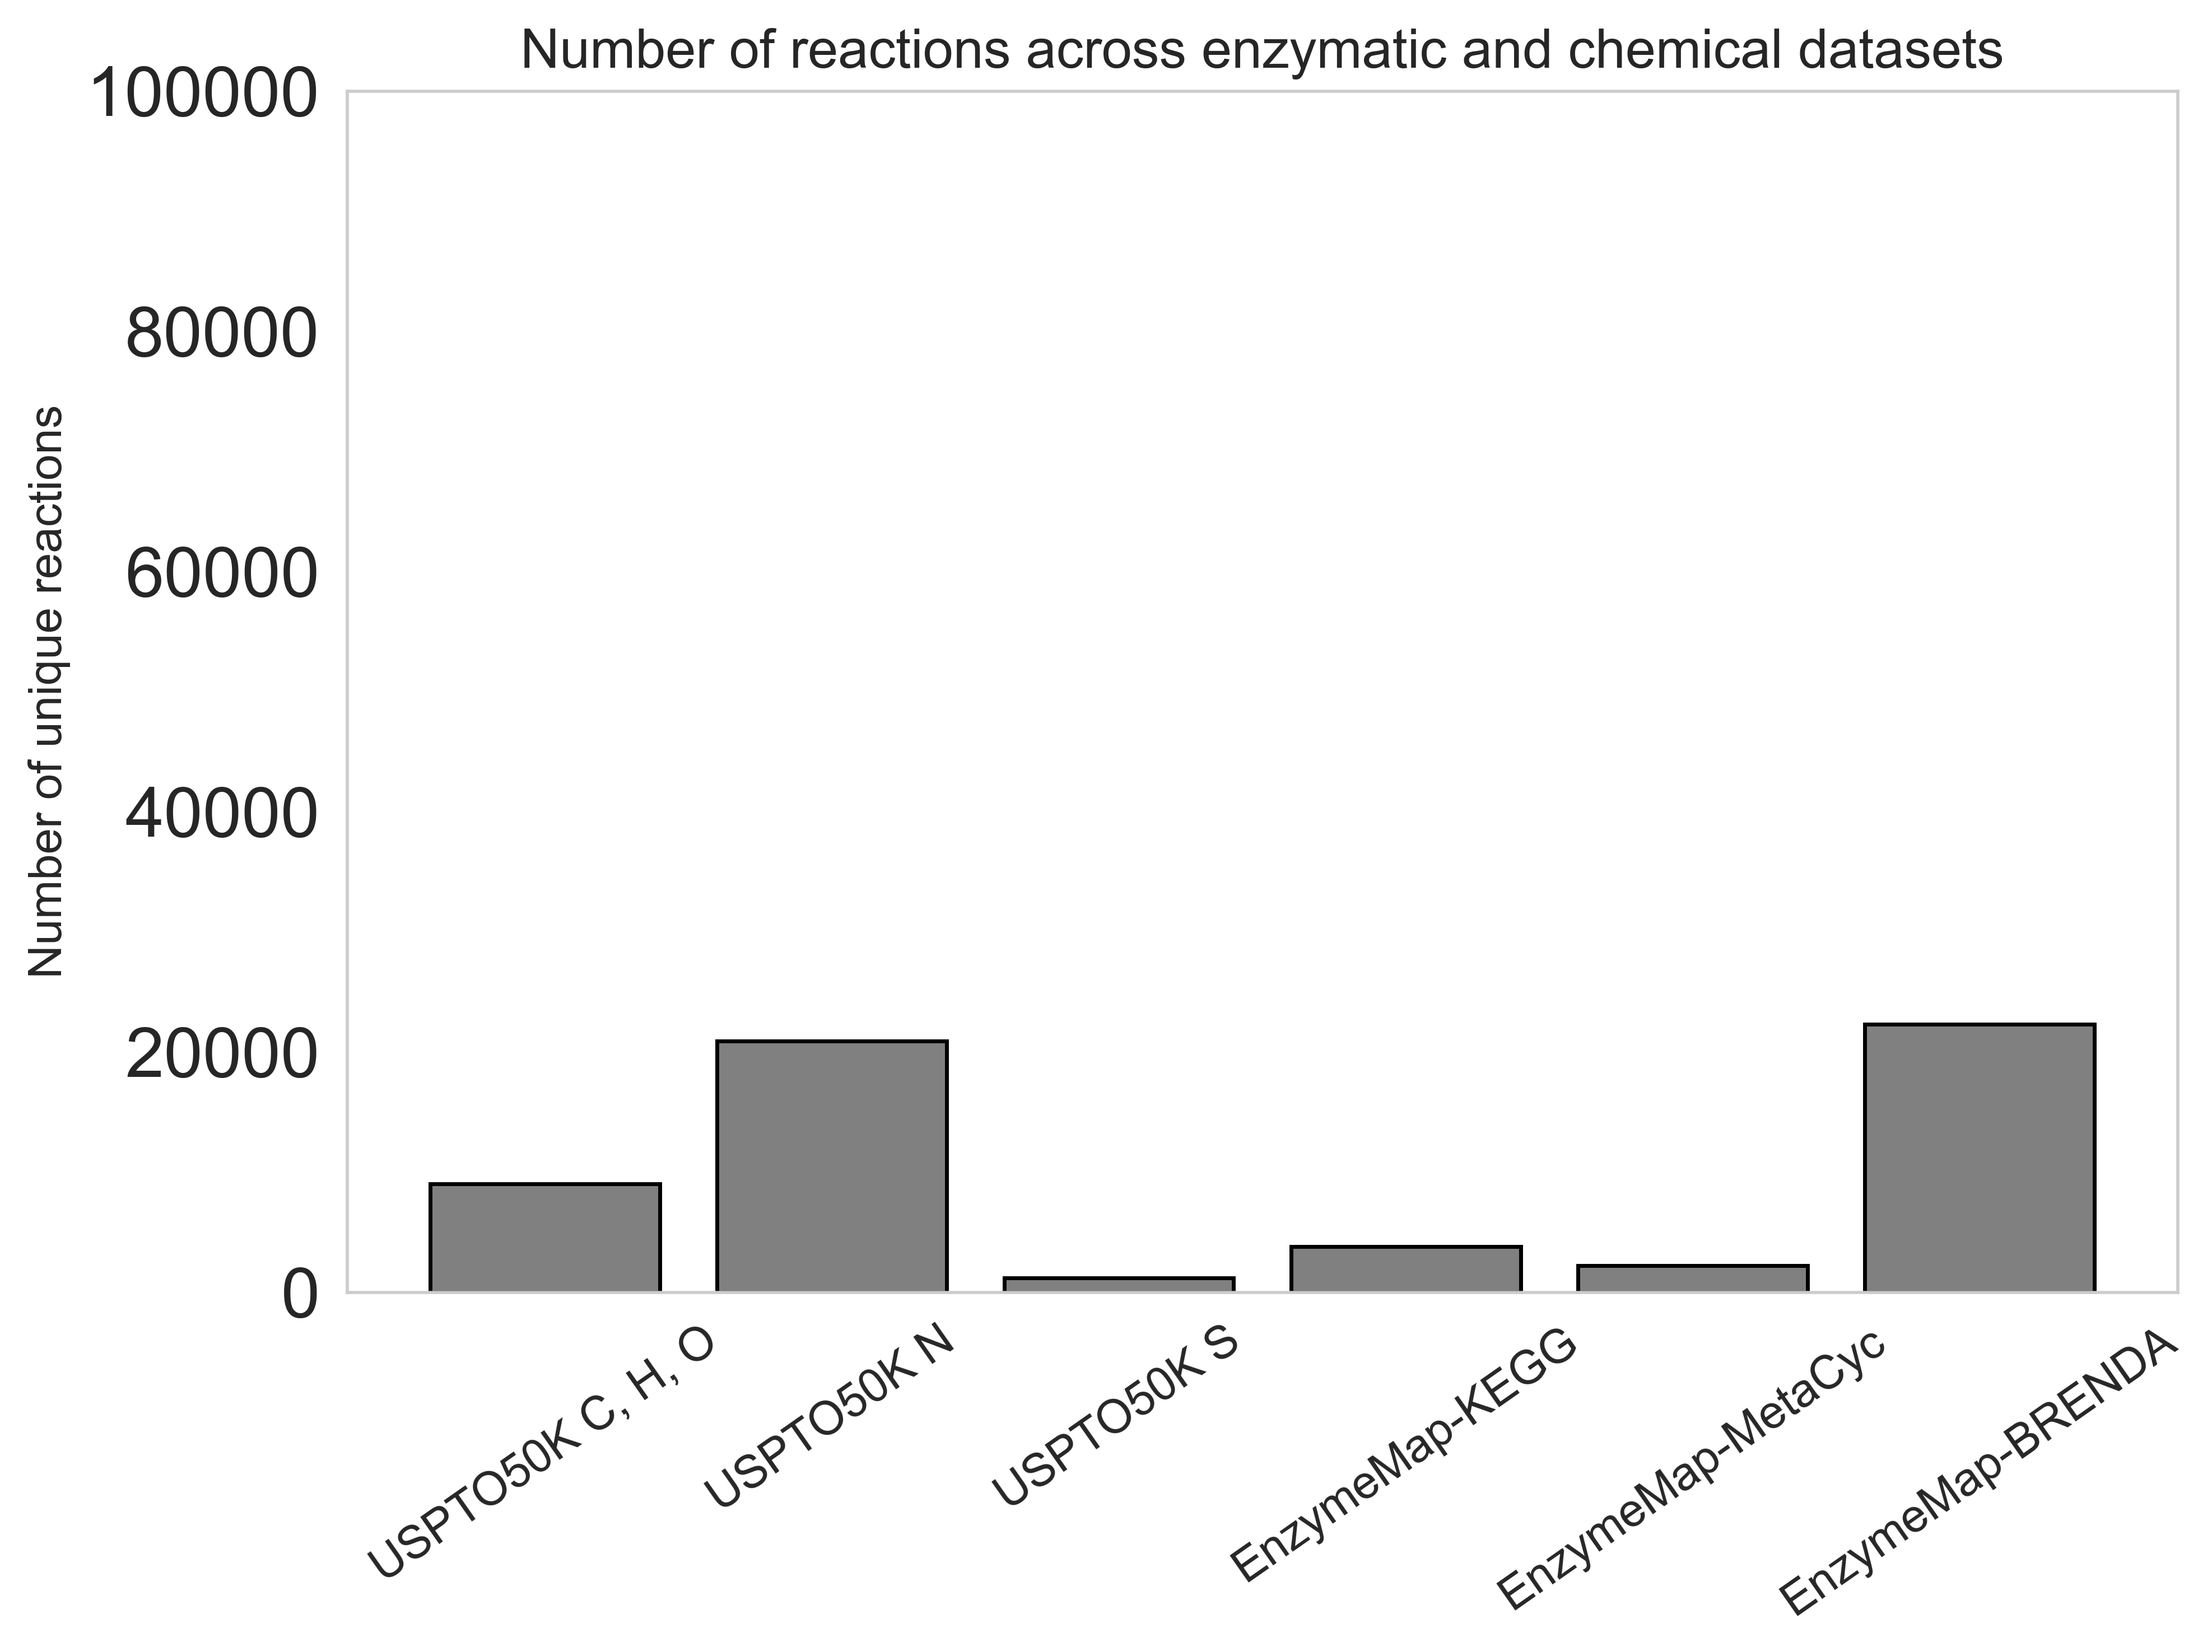

In [8]:
import matplotlib.pyplot as plt

labels = ['USPTO50K C, H, O', 
          'USPTO50K N', 
          'USPTO50K S',
          'EnzymeMap-KEGG',
          'EnzymeMap-MetaCyc',
          'EnzymeMap-BRENDA',]

values = [num_unique_rxns_USPTO50K_CHO, 
          num_unique_rxns_USPTO50K_N, 
          num_unique_rxns_USPTO50K_onlyS,
          num_unique_rxns_KEGG,
          num_unique_rxns_MetaCyc,
          num_unique_rxns_BRENDA]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='grey', edgecolor = 'k')

# Labels and title
plt.xticks(rotation = 35, fontsize = 12)
plt.ylabel('Number of unique reactions', fontsize = 12)
plt.title('Number of reactions across enzymatic and chemical datasets', fontsize = 14)
plt.grid(visible = False)
plt.ylim([0, 100000])
plt.savefig('../figures/distribution_of_unique_reactions_only.png')
plt.show()

Now, we read in the set of unique reactant-template mappings arising from these mapped enzymatic and synthetic chemistry reactions. Note that this is a dataset of single reactant to single template pairs because it will be used to train a template prioritizer model. At inference time, this model will take in a reactant structure and predict which templates are likely to apply to this input reactant structure. The output to this model will be a probability distribution over all 3900 or so biology and chemistry templates from which the most probable chemoenzymatic templates can then be extracted.  

In [11]:
combined_reactant_template_pairs_df = pd.read_csv('../data/processed/all_bio_and_chem_unique_reactant_template_pairs_no_stereo.csv')

In [12]:
combined_reactant_template_pairs_df.head(5)

,Reactant,Template Label,Type
0,O=C(O)c1[nH]c(=O)n(C2OCC(O)C2O)c(=O)c1F,rule0024_52,bio
1,N=C(N)NCCCC(N)C(=O)O,rule0257_1,bio
2,O=C(O)C=CC(=O)O,rule0257_1,bio
3,N=C(N)NCCCC(N)C(=O)O,rule0303_2,bio
4,O=C(O)C=CC(=O)O,rule0303_2,bio


In [13]:
bio_reactant_template_pairs_df = combined_reactant_template_pairs_df[combined_reactant_template_pairs_df['Type']=='bio']
chem_reactant_template_pairs_df = combined_reactant_template_pairs_df[combined_reactant_template_pairs_df['Type']=='chem']

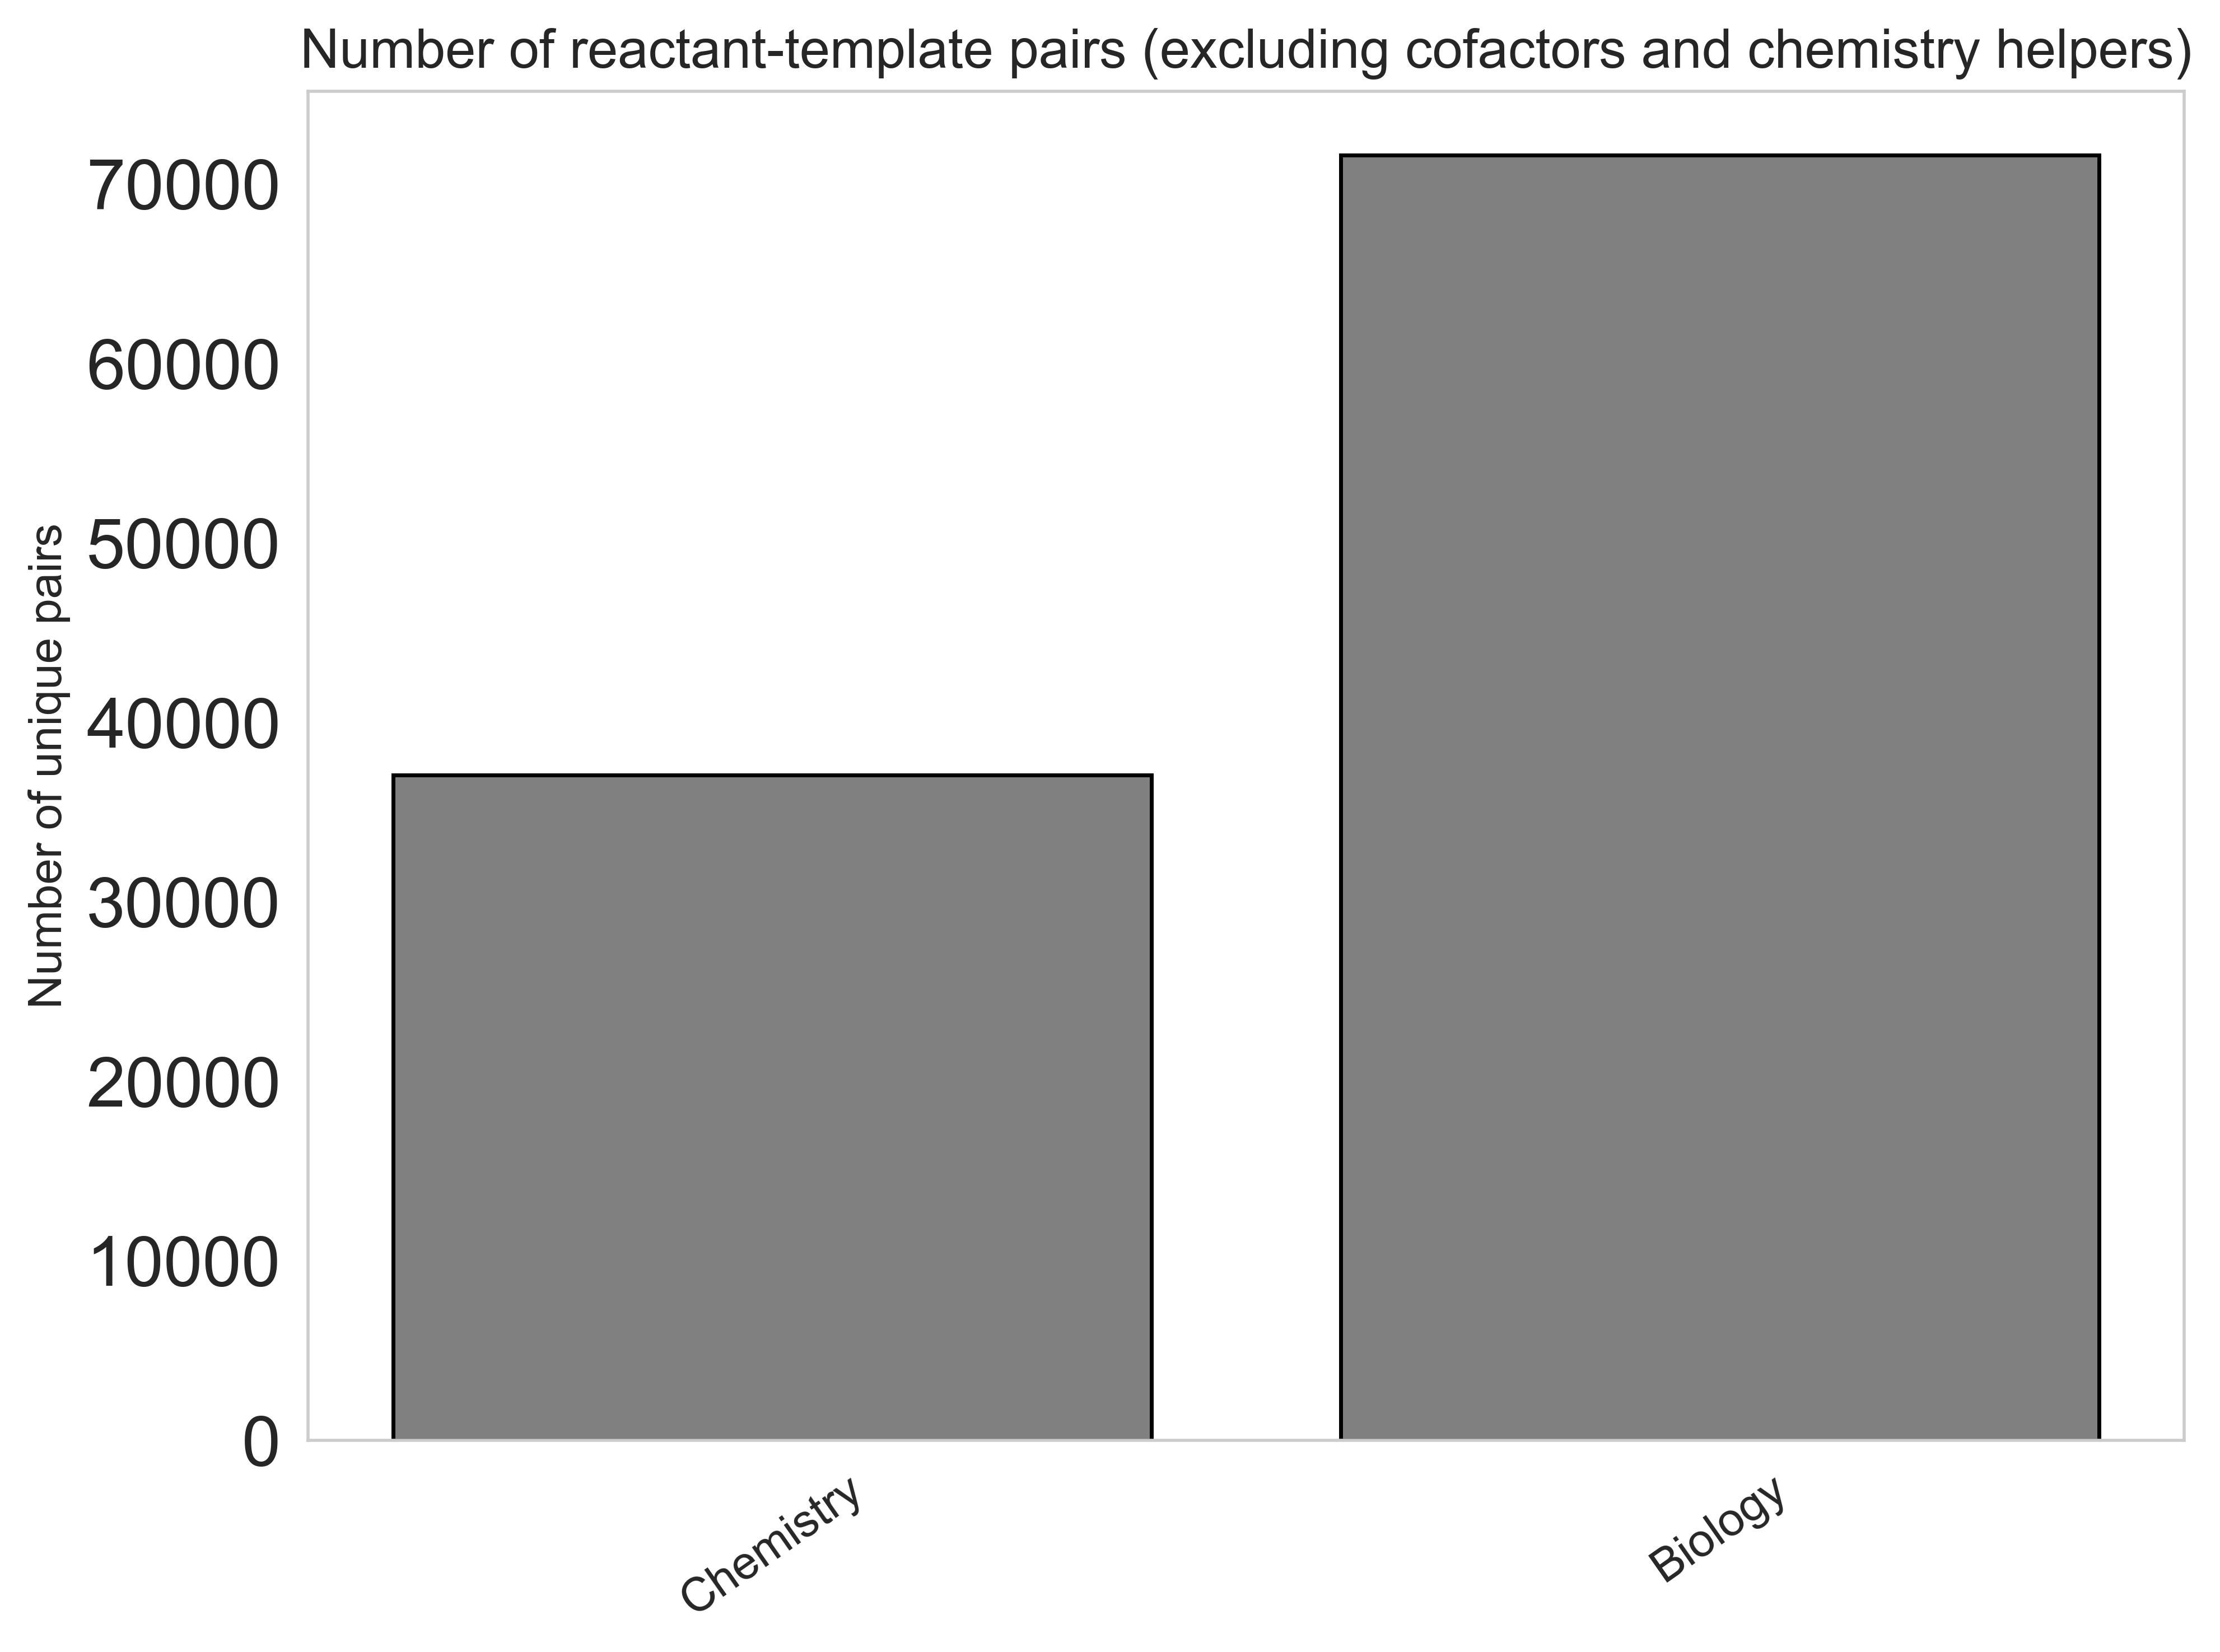

In [15]:
import matplotlib.pyplot as plt

labels = ['Chemistry', 
          'Biology']

values = [chem_reactant_template_pairs_df.shape[0], 
          bio_reactant_template_pairs_df.shape[0]]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color='grey', edgecolor = 'k')

# Labels and title
plt.xticks(rotation = 35, fontsize = 12)
plt.ylabel('Number of unique pairs', fontsize = 12)
plt.title('Number of reactant-template pairs (excluding cofactors and chemistry helpers)', fontsize = 14)
plt.grid(visible = False)
plt.savefig('../figures/distribution_of_unique_reactant_template_pairs.png')
plt.show()